### CNN Training in Time Domain

In [1]:
import preprocessor.time_preprocessor as preprocessor
X_train, y_train, X_val, y_val, X_test, y_test = preprocessor.preprocess()
print(X_train.shape)

Reading: ./data/chb19/chb19_29.edf
Reading: ./data/chb16/chb16_16.edf
Reading: ./data/chb14/chb14_17.edf
Reading: ./data/chb04/chb04_28.edf
Reading: ./data/chb15/chb15_10.edf
Reading: ./data/chb12/chb12_23.edf
Reading: ./data/chb05/chb05_17.edf
Reading: ./data/chb13/chb13_59.edf
Reading: ./data/chb10/chb10_20.edf
Reading: ./data/chb13/chb13_21.edf
Reading: ./data/chb06/chb06_01.edf
Reading: ./data/chb08/chb08_02.edf
Reading: ./data/chb20/chb20_13.edf
Reading: ./data/chb07/chb07_12.edf
Reading: ./data/chb06/chb06_04.edf
Reading: ./data/chb13/chb13_40.edf
Reading: ./data/chb23/chb23_08.edf
Reading: ./data/chb16/chb16_14.edf
Reading: ./data/chb21/chb21_21.edf
Reading: ./data/chb02/chb02_19.edf
Reading: ./data/chb03/chb03_02.edf
Reading: ./data/chb08/chb08_11.edf
Reading: ./data/chb12/chb12_33.edf
Reading: ./data/chb14/chb14_04.edf
Reading: ./data/chb14/chb14_11.edf
Reading: ./data/chb14/chb14_06.edf
Reading: ./data/chb18/chb18_30.edf
Reading: ./data/chb05/chb05_16.edf
Reading: ./data/chb2

Load CNN model

In [2]:
from ia.model.cnn.time_cnn import TimeCNN
time_cnn = TimeCNN(input_shape=(X_train[0].shape))

In [3]:
time_cnn.compile()

In [4]:
NR_EPOCHS = 100
BATCH_SIZE = 250

In [5]:
history = time_cnn.fit(X_train, y_train, num_epochs=NR_EPOCHS, batch_size=BATCH_SIZE, val_data=X_val, val_labels=y_val)

Epoch 1/100
16/16 [==============================] - 1s 38ms/step - loss: 0.6833 - accuracy: 0.5988 - val_loss: 0.6563 - val_accuracy: 0.6406
Epoch 2/100
16/16 [==============================] - 0s 25ms/step - loss: 0.6607 - accuracy: 0.6427 - val_loss: 0.6564 - val_accuracy: 0.6406
Epoch 3/100
16/16 [==============================] - 0s 26ms/step - loss: 0.6610 - accuracy: 0.6448 - val_loss: 0.6582 - val_accuracy: 0.6406
Epoch 4/100
16/16 [==============================] - 0s 26ms/step - loss: 0.6556 - accuracy: 0.6448 - val_loss: 0.6553 - val_accuracy: 0.6406
Epoch 5/100
16/16 [==============================] - 0s 28ms/step - loss: 0.6546 - accuracy: 0.6453 - val_loss: 0.6584 - val_accuracy: 0.6406
Epoch 6/100
16/16 [==============================] - 0s 27ms/step - loss: 0.6571 - accuracy: 0.6409 - val_loss: 0.6550 - val_accuracy: 0.6406
Epoch 7/100
16/16 [==============================] - 0s 26ms/step - loss: 0.6562 - accuracy: 0.6456 - val_loss: 0.6566 - val_accuracy: 0.6406
Epoch 

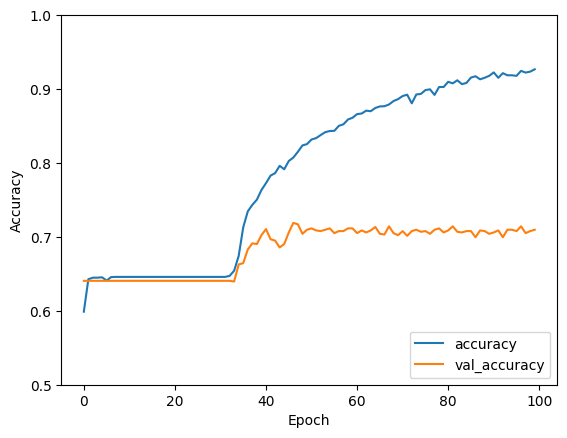

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [7]:
time_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 32)            122912    
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 32)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 1, 64)             0         
 g1D)                                                            
                                                                 
 global_max_pooling1d (Glob  (None, 64)                0         
 alMaxPooling1D)                                                 
                                                        

In [8]:
import numpy as np
predictions = time_cnn.model.predict(X_test)
predictions = np.array([prediction > 0.5 for prediction in predictions])

for i in range(len(y_test)):
    print("PREDICTION: " + str(predictions[i]) + " | " +  "REAL: " + str(y_test[i]))

7/7 [==============================] - 0s 3ms/step
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [ True] | REAL: False
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [False] | REAL: True
PREDICTION: [ True] | REAL: True
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTION: [False] | REAL: False
PREDICTI

In [9]:
test_loss, test_acc = time_cnn.model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

7/7 [==============================] - 0s 3ms/step - loss: 0.8997 - accuracy: 0.6600
Test accuracy: 0.6600000262260437
Test loss: 0.8996852040290833


### Metrics:

In [12]:
from ia.metrics.metrics import Metrics
metrics = Metrics(y_test, predictions, time_cnn.name(), "time")
metrics.all_metrics()
metrics.metrics_to_database()

True Positives: 28
True Negatives: 104
False Positives: 47
False Negatives: 21
total Samples: 200
Accuracy: 0.66
Precision: 0.37333333333333335
Sensitivity: 0.5714285714285714
Specificity: 0.6887417218543046
TPR: 0.37333333333333335
FPR: 0.31125827814569534
F1-Score: 0.6125290023201856


ROC curve

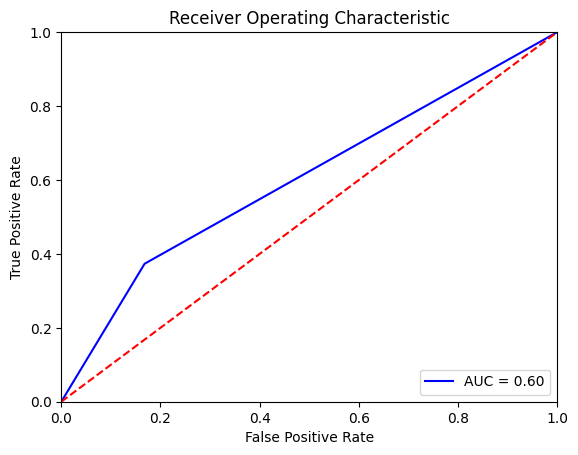

In [14]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()